# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

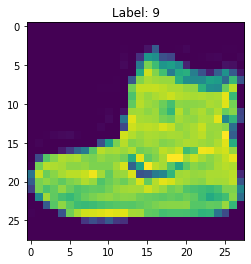

In [3]:
import matplotlib.pyplot as plt

sample_image = x_train[0]
plt.imshow(sample_image)
plt.title(f'Label: {y_train[0]}')
plt.show()

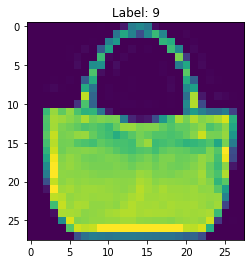

In [4]:
# Другой пример
sample_image = x_train[100]
plt.imshow(sample_image)
plt.title(f'Label: {y_train[0]}')
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [5]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0
print(x_test_normalized.max())
print(x_test_normalized.min())

1.0
0.0


**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [6]:
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], 28, 28, 1)

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Преобразуйте  y_train и y_test в one_hot представления **

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Сверточный слой
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))

# Пулинг
model.add(MaxPooling2D(pool_size=(2, 2)))

# Выравнивание
model.add(Flatten())

# Полносвязный
model.add(Dense(128, activation='relu'))

# Выходной
model.add(Dense(10, activation='softmax'))

# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Выводим структуру модели
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [16]:
# Тренируем модель
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 10s 13ms/step - loss: 0.4701 - accuracy: 0.8327 - val_loss: 0.3466 - val_accuracy: 0.8749
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.3081 - accuracy: 0.8896 - val_loss: 0.3269 - val_accuracy: 0.8831
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.2632 - accuracy: 0.9040 - val_loss: 0.2821 - val_accuracy: 0.8991
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.2315 - accuracy: 0.9139 - val_loss: 0.2586 - val_accuracy: 0.9068
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.2093 - accuracy: 0.9225 - val_loss: 0.2710 - val_accuracy: 0.9018


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [17]:
from sklearn.metrics import classification_report

# Получаем предсказания модели
y_pred = model.predict(x_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.75      0.82      1000
           3       0.95      0.88      0.91      1000
           4       0.74      0.93      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.69      0.75      0.72      1000
           7       0.96      0.95      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

1/1 [==============================] - 0s 32ms/step
Epoch 1/4
657/657 [==============================] - 9s 14ms/step - loss: 0.1869 - accuracy: 0.9300 - val_loss: 0.2585 - val_accuracy: 0.9053
Epoch 2/4
657/657 [==============================] - 9s 13ms/step - loss: 0.1687 - accuracy: 0.9381 - val_loss: 0.2390 - val_accuracy: 0.9187
Epoch 3/4
657/657 [==============================] - 10s 15ms/step - loss: 0.1526 - accuracy: 0.9438 - val_loss: 0.2648 - val_accuracy: 0.9091
Epoch 4/4
1/1 [==============================] - 0s 13ms/step


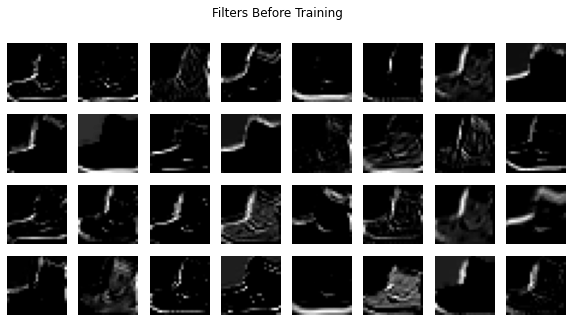

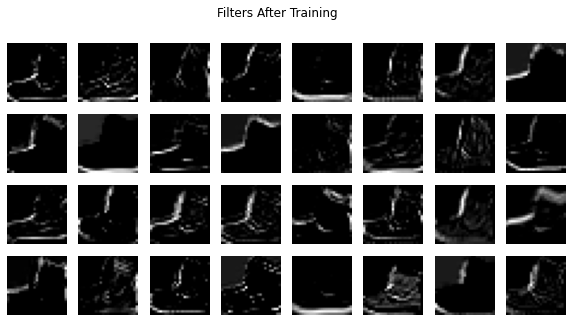

In [20]:
# Создаем модель только с первым сверточным слоем
layer_name = 'conv2d_1'
new_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Получаем выход первого сверточного слоя перед обучением
layer_output_before_training = new_model.predict(x_train_reshaped[:1])

# Тренируем новую модель
model.fit(x_train_reshaped, y_train_one_hot, epochs=4, batch_size=64, validation_split=0.3)

# Получаем выход первого сверточного слоя после обучения
layer_output_after_training = new_model.predict(x_train_reshaped[:1])

# Отрисовываем фильтры перед и после обучения
plt.figure(figsize=(10, 5))
plt.suptitle('Filters Before Training')
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(layer_output_before_training[0, :, :, i], cmap='gray')
    plt.axis('off')

plt.figure(figsize=(10, 5))
plt.suptitle('Filters After Training')
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(layer_output_after_training[0, :, :, i], cmap='gray')
    plt.axis('off')

plt.show()


### Небольшие изменения есть